In [26]:
import numpy as np
import util
import sys
import matplotlib
import matplotlib.pyplot as plt

sys.path.append('../linearclass/')
from logistic_regression import LogisticRegression, sigmoid

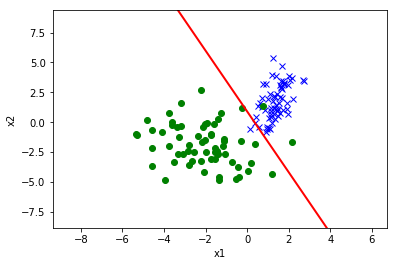

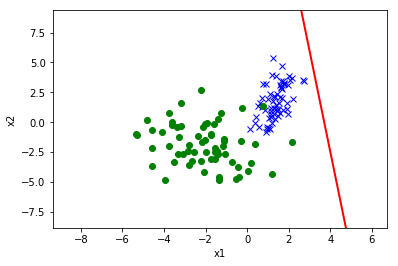

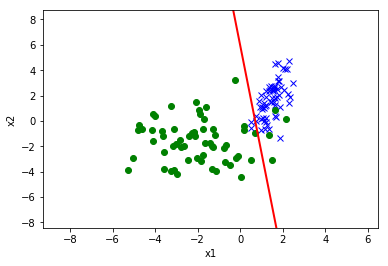

In [40]:
# Character to replace with sub-problem letter in plot_path/save_path
WILDCARD = 'X'


def main(train_path, valid_path, test_path, save_path):
    """Problem 2: Logistic regression for incomplete, positive-only labels.

    Run under the following conditions:
        1. on t-labels,
        2. on y-labels,
        3. on y-labels with correction factor alpha.

    Args:
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        save_path: Path to save predictions.
    """
    output_path_true = save_path.replace(WILDCARD, 'true')
    output_path_naive = save_path.replace(WILDCARD, 'naive')
    output_path_adjusted = save_path.replace(WILDCARD, 'adjusted')

    # *** START CODE HERE ***
    # Part (a): Train and test on true labels
    # Make sure to save predicted probabilities to output_path_true using np.savetxt()
    x_train, t_train = util.load_dataset(train_path, label_col='t', add_intercept=True)
    lr_true = LogisticRegression()
    lr_true.fit(x_train, t_train)
    
    # test
    x_test, t_test = util.load_dataset(test_path, label_col='t', add_intercept=True)
    t_test_true_pred = lr_true.predict(x_test)
    np.savetxt(output_path_true, t_test_true_pred)
    util.plot(x_test, t_test, lr_true.theta, save_path=output_path_true[:-4] + '_plot' + '.jpeg')
    
    
    # Part (b): Train on y-labels and test on true labels
    # Make sure to save predicted probabilities to output_path_naive using np.savetxt()
    x_train, y_train = util.load_dataset(train_path, label_col='y', add_intercept=True)
    lr_y = LogisticRegression()
    lr_y.fit(x_train, y_train)
    
    # test
    x_test, y_test = util.load_dataset(test_path, label_col='y', add_intercept=True)
    t_test_naive_pred = lr_y.predict(x_test)
    np.savetxt(output_path_naive, t_test_naive_pred)
    util.plot(x_test, t_test, lr_y.theta, save_path = output_path_naive[:-4] + '_plot' + '.jpeg')
    
#     x = plt.figure()
#     plt.scatter(x_test[:,2], y_test)
#     plt.show()

    # Part (f): Apply correction factor using validation set and test on true labels
    # Plot and use np.savetxt to save outputs to output_path_adjusted
    x_valid, y_valid = util.load_dataset(valid_path, label_col='y', add_intercept=True)
    t_valid_naive_pred = lr_y.predict(x_valid)
    
    # compute correction factor ahlpa
    labeled_set = t_valid_naive_pred[y_valid == 1]
    alpha = np.sum(labeled_set)/np.shape(labeled_set)[0]
    
    # compute adjusted predictions using correction factor alpha
    t_valid_adjusted_pred = (1/alpha)*t_valid_naive_pred
    np.savetxt(output_path_adjusted, t_valid_adjusted_pred)
    
    # plot adjusted decision boundary for validation set with the true labels
    x_valid, t_valid = util.load_dataset(valid_path, label_col='t', add_intercept=True)
    util.plot(x_valid, t_valid, lr_y.theta, save_path = output_path_adjusted[:-4] + '_plot' + '.jpeg', correction=alpha)
    # *** END CODER HERE

if __name__ == '__main__':
    main(train_path='train.csv',
        valid_path='valid.csv',
        test_path='test.csv',
        save_path='posonly_X_pred.txt')
